# Sentiment Analysis on TripAdvisor  Data

Load the Libraries

In [1]:
!pip install spaCy

In [5]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [1]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [2]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
!pip install beautifulsoup4

In [4]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [5]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.


True

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

Upload Data

In [7]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [8]:
import os
PATH = os.getcwd()
DATADIR = PATH + '/drive/My Drive/Short.csv'

In [9]:
#Read data
df = pd.read_csv(DATADIR)
df.shape

(18425, 4)

In [10]:
df.head()

,Index,Source,Text,Length
0,1,Susanli,Plandemic,9
1,2,Coaid,ÒBreaking,10
2,3,Susanli,Alcohol ban,11
3,4,Coaid,ÒCoronavirus,13
4,5,Susanli,Coronavirus & 5G,16


In [11]:
import spacy
import en_core_web_lg
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

nlp = en_core_web_lg.load()
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

# Want to keep negative stop words for sentiment analysis
stopword_list.remove('no')
stopword_list.remove('not')

In [12]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>text text text</h2></html>')

'text text text'

In [13]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('some accented letters â î or ô')

'some accented letters a i or o'

In [14]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match) \
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

expand_contractions("y'all I've don't I'd we're")

'you all I have do not I would we are'

In [16]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("S0me sp3ci@l c#@4@c|3rs *&)@&)@#&", remove_digits=True)

'Sme spcil ccrs '

In [18]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text(str(df.Text[0]))

'Plandemic'

In [19]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

remove_stopwords(str(df.Text[0]))

'Plandemic'

In [20]:
def normalize_corpus(corpus, html_stripping=True, accented_char_removal=True, contraction_expansion=True, 
                    text_lower_case=True, text_lemmatization=True, special_char_removal=True, stopword_removal=True,
                    remove_digits=True):
    normalized_corpus = []
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # expand contractions
        if contraction_expansion:
            doc = expand_contractions(doc)
        # turn into lowercase
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ', doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and/or digits
        if special_char_removal:
            # insert spaces between special characters to isolate them
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        # remove extra whitespaces
        doc = re.sub(' _', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
    
    return normalized_corpus

In [21]:
# combine news headline and article text into one doc
df['full_text'] = df["Text"]

# pre-process text
df['clean_text'] = normalize_corpus(df['full_text'])
norm_corpus = list(df['clean_text'])
df.iloc[1][['full_text', 'clean_text']].to_dict()

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/73UkUxFgTb
################################################################################https://www.greenmedinfo.com/blog/new-bill-hr6666-could-cement-place-covid-19-medical-police-state-stand-oppose-nowsa" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


{'clean_text': 'obreaking', 'full_text': 'ÒBreaking'}

# Text Parsing

POS Tagging


In [23]:
# pre-process, but don't lowercase or lemmatize to get POS context
corpus = normalize_corpus(df['full_text'], text_lower_case=False, text_lemmatization=False, special_char_removal=False)

# demo for POS tagging
sentence = str(df.iloc[0].Text)
sentence_nlp = nlp(sentence)

# POS tagging with spacy
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
df_spacy_pos_tagged = pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
df_nltk_pos_tagged = pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])


/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "https://t.co/73UkUxFgTb
################################################################################https://www.greenmedinfo.com/blog/new-bill-hr6666-could-cement-place-covid-19-medical-police-state-stand-oppose-nowsa" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


In [24]:
sentence

'Plandemic'

In [25]:
df_spacy_pos_tagged

,Word,POS tag,Tag type
0,Plandemic,NNP,PROPN


In [27]:
df_nltk_pos_tagged

,Word,POS tag
0,Plandemic,NNP


Shallow Parsing (Chunking)

In [28]:
# using nltk conll2000 corpus to train the shallow parser model
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:]

print(len(train_data), len(test_data))
print(train_data[0])

10900 48
(S
  (NP Confidence/NN)
  (PP in/IN)
  (NP the/DT pound/NN)
  (VP is/VBZ widely/RB expected/VBN to/TO take/VB)
  (NP another/DT sharp/JJ dive/NN)
  if/IN
  (NP trade/NN figures/NNS)
  (PP for/IN)
  (NP September/NNP)
  ,/,
  due/JJ
  (PP for/IN)
  (NP release/NN)
  (NP tomorrow/NN)
  ,/,
  (VP fail/VB to/TO show/VB)
  (NP a/DT substantial/JJ improvement/NN)
  (PP from/IN)
  (NP July/NNP and/CC August/NNP)
  (NP 's/POS near-record/JJ deficits/NNS)
  ./.)


In [29]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[0])
wtc

[('Confidence', 'NN', 'B-NP'),
 ('in', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('pound', 'NN', 'I-NP'),
 ('is', 'VBZ', 'B-VP'),
 ('widely', 'RB', 'I-VP'),
 ('expected', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('take', 'VB', 'I-VP'),
 ('another', 'DT', 'B-NP'),
 ('sharp', 'JJ', 'I-NP'),
 ('dive', 'NN', 'I-NP'),
 ('if', 'IN', 'O'),
 ('trade', 'NN', 'B-NP'),
 ('figures', 'NNS', 'I-NP'),
 ('for', 'IN', 'B-PP'),
 ('September', 'NNP', 'B-NP'),
 (',', ',', 'O'),
 ('due', 'JJ', 'O'),
 ('for', 'IN', 'B-PP'),
 ('release', 'NN', 'B-NP'),
 ('tomorrow', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('fail', 'VB', 'B-VP'),
 ('to', 'TO', 'I-VP'),
 ('show', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('substantial', 'JJ', 'I-NP'),
 ('improvement', 'NN', 'I-NP'),
 ('from', 'IN', 'B-PP'),
 ('July', 'NNP', 'B-NP'),
 ('and', 'CC', 'I-NP'),
 ('August', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('near-record', 'JJ', 'I-NP'),
 ('deficits', 'NNS', 'I-NP'),
 ('.', '.', 'O')]

In [30]:
# extract POS and chunk tags from sentences with chunked annotations
def conll_tags_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

# function to train multiple taggers
def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [31]:
%%time

from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger
from nltk.chunk import ChunkParserI

# chunker class
class NGramTagChunker(ChunkParserI):
    def __init__(self, train_sentences, tagger_classes=[UnigramTagger, BigramTagger]):
        # get the POS and chunk tags using our function above
        train_sent_tags = conll_tags_chunks(train_sentences)
        # train chunk tagger from POS tags
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)
    
    def parse(self, tagged_sentence):
        if not tagged_sentence:
            return None
        # get POS tags from our tagged sentence
        pos_tags = [tag for word, tag in tagged_sentence]
        # Get chunk tags from the trained taggers
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        # Combine token, pos tag and chunk tags
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag)
                       in zip(tagged_sentence, chunk_tags)]
        return conlltags2tree(wpc_tags)
    
# train chunker model
ntc = NGramTagChunker(train_data)

# evaluate chunker model performance
print('Performance on training data:\n', ntc.evaluate(train_data))
print()
print('Performance on test data:\n', ntc.evaluate(test_data))
        

Performance on training data:
 ChunkParse score:
    IOB Accuracy:  89.4%%
    Precision:     80.9%%
    Recall:        86.2%%
    F-Measure:     83.5%%

Performance on test data:
 ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%
CPU times: user 8.68 s, sys: 393 ms, total: 9.07 s
Wall time: 9.07 s


In [32]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S (NP Plandemic/NNP))


# Sentiment Analysis

In [33]:
!pip install afinn

     |████████████████████████████████| 61kB 3.1MB/s 
  Created wheel for afinn: filename=afinn-0.1-cp36-none-any.whl size=53453 sha256=511fc1527fb6d63d705e56940612314f0068476c32487a444143cd49f8af701b
  Stored in directory: /root/.cache/pip/wheels/b5/1c/de/428301f3333ca509dcf20ff358690eb23a1388fbcbbde008b2
Successfully built afinn


In [35]:
from afinn import Afinn
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                          else 'neutral' 
                          for score in sentiment_scores]

# sentiment statistics per news category
dfA = pd.DataFrame([list(df['Text']), sentiment_scores, sentiment_category]).T
dfA.columns = ['Text', 'sentiment_score', 'sentiment_category']
dfA['sentiment_score'] = dfA.sentiment_score.astype('float')
dfA.head()

,Text,sentiment_score,sentiment_category
0,Plandemic,0.0,neutral
1,ÒBreaking,0.0,neutral
2,Alcohol ban,-2.0,negative
3,ÒCoronavirus,0.0,neutral
4,Coronavirus & 5G,0.0,neutral


In [37]:
dfA.groupby(by=['sentiment_category']).describe()

sentiment_score                     ...                
                             count      mean      std  ...  50%  75%   max
sentiment_category                                     ...                
negative                    8888.0 -3.140302  2.34198  ... -3.0 -2.0  -1.0
neutral                     5565.0  0.000000  0.00000  ...  0.0  0.0   0.0
positive                    3972.0  2.383686  1.66021  ...  2.0  3.0  15.0

[3 rows x 8 columns]

In [ ]:
dfA.groupby(by=['CONTINENT']).describe().to_csv("affin continentwise description.csv")

In [ ]:
import seaborn as sns

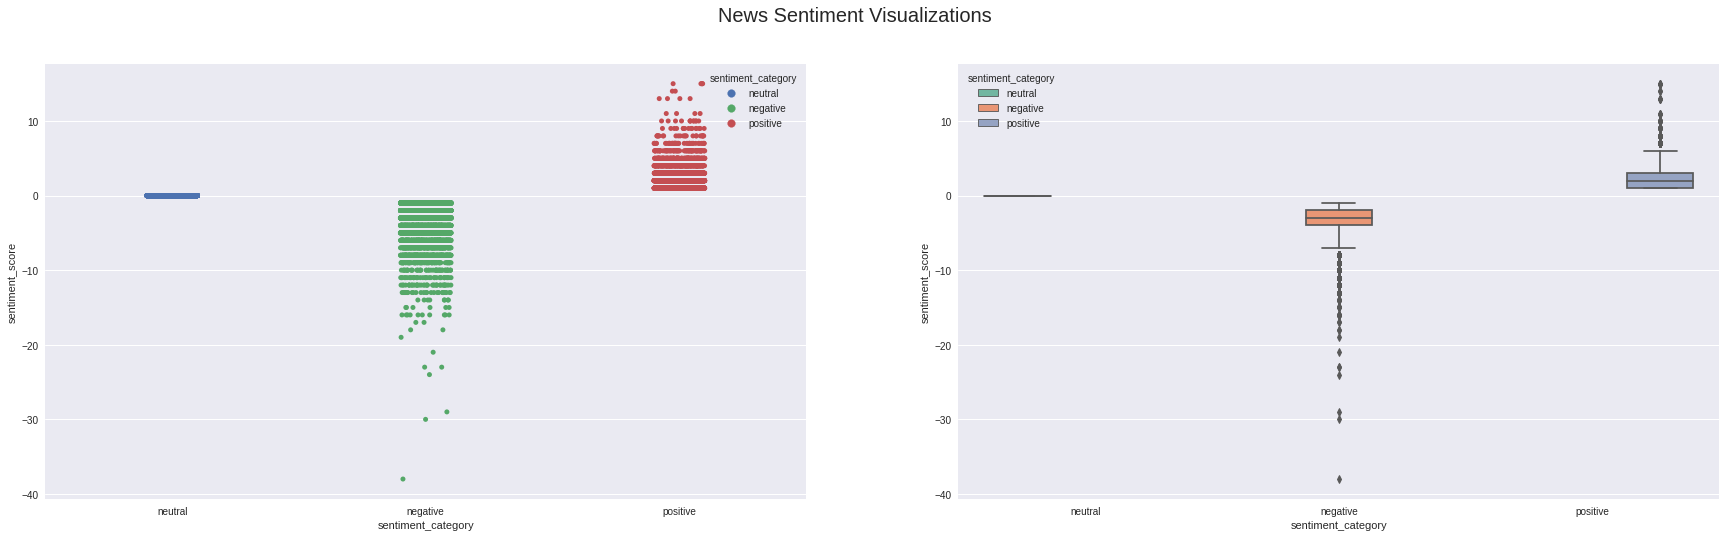

In [36]:
plt.style.use("seaborn")
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 8))
sp = sns.stripplot(x='sentiment_category', y='sentiment_score', 
                   hue='sentiment_category', data=dfA, ax=ax1)
bp = sns.boxplot(x='sentiment_category', y='sentiment_score', 
                 hue='sentiment_category', data=dfA, palette='Set2', ax=ax2)
t = f.suptitle('News Sentiment Visualizations', fontsize=20)

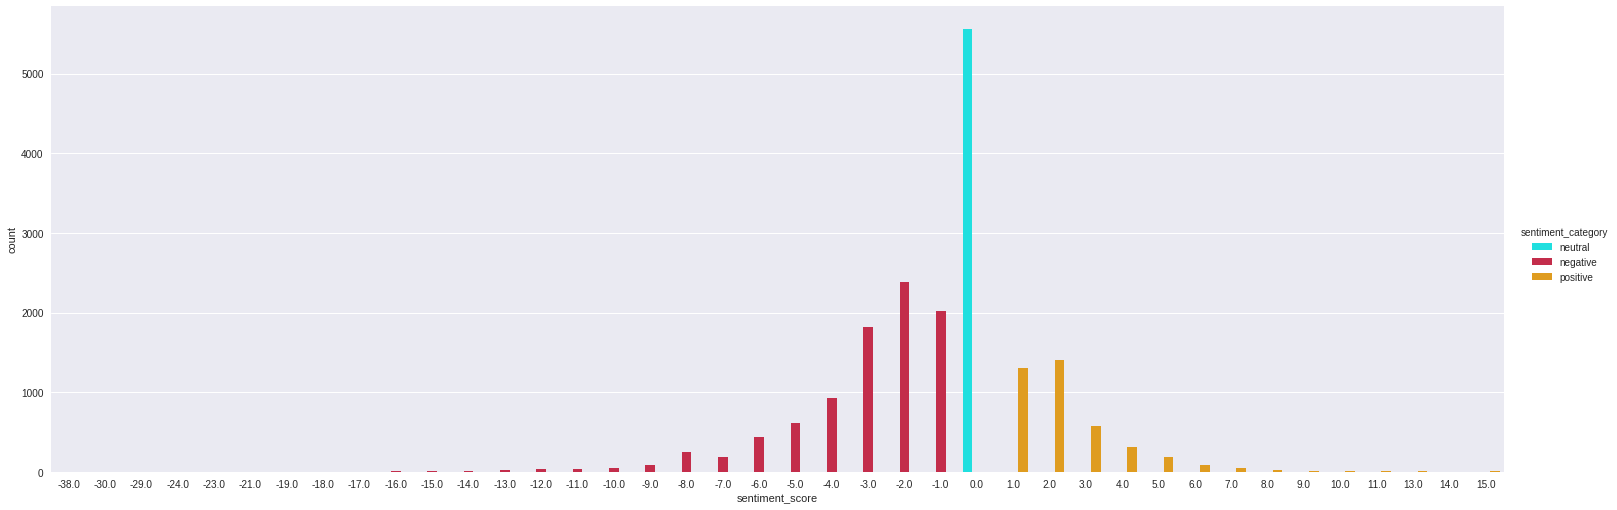

In [60]:
# frequency of sentiment labels
#plt.figure(figsize=(200,20))
fc = sns.catplot(x="sentiment_score", hue="sentiment_category", 
                 data=dfA, kind="count",
                 palette={'negative': 'crimson',
                          'positive': 'orange',
                          'neutral': 'aqua'}, height=7, aspect=3)

Text Blob

In [41]:
from textblob import TextBlob

# computer sentiment scores (polarty) and labels
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                          else 'negative' if score < 0 
                          else 'neutral' 
                          for score in sentiment_scores_tb]

# sentiment statistics per news category
dfT = pd.DataFrame([list(df['Text']), sentiment_scores_tb, sentiment_category_tb]).T
dfT.columns = ['Text', 'sentiment_score', 'sentiment_category']
dfT['sentiment_score'] = dfT.sentiment_score.astype('float')
dfT.head()
#df.groupby(by=['COUNTRY']).describe()

,Text,sentiment_score,sentiment_category
0,Plandemic,0.0,neutral
1,ÒBreaking,0.0,neutral
2,Alcohol ban,0.0,neutral
3,ÒCoronavirus,0.0,neutral
4,Coronavirus & 5G,0.0,neutral


In [ ]:
dfT.to_csv('textblobresults.csv')

In [42]:
dfT.groupby(by=['sentiment_category']).describe()

sentiment_score                      ...                     
                             count      mean       std  ...    50%    75%    max
sentiment_category                                      ...                     
negative                    4052.0 -0.247002  0.202968  ... -0.188 -0.100 -0.001
neutral                     8758.0  0.000000  0.000000  ...  0.000  0.000  0.000
positive                    5615.0  0.216006  0.176812  ...  0.168  0.286  1.000

[3 rows x 8 columns]

In [ ]:
dfA.groupby(by=['CONTINENT']).describe().to_csv("textblob continentwise description.csv")

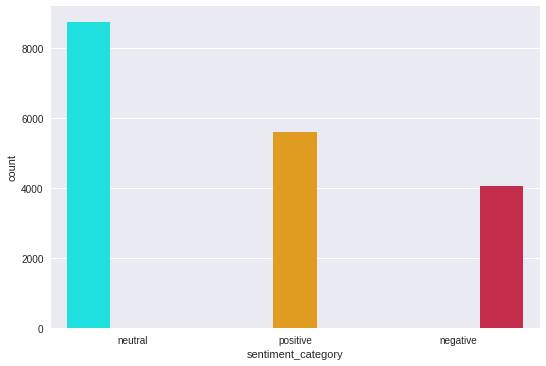

In [56]:
fc = sns.catplot(x="sentiment_category", hue="sentiment_category", 
                    data=dfT, kind="count", 
                    palette={'negative': 'crimson',
                             'positive': 'orange',
                             'neutral': 'aqua'}, height=5, aspect=1.5)

Comparison

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, ax, vmax=None,
                          normed=True, title='Confusion matrix',
                          class_names=None, labels=None):
    cm = confusion_matrix(y_true, y_pred)
    if normed:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, vmax=vmax, annot=True, square=True, ax=ax, 
                cmap='Blues', cbar=False, linecolor='k',
               linewidths=1, xticklabels=class_names)
    ax.set_title(title, fontsize=16)
    if not labels:
        labels=['True Labels', 'Predicted Labels']

    ax.set_ylabel(labels[0], fontsize=12)
    ax.set_xlabel(labels[1], y=1.10, fontsize=12)
    ax.set_yticklabels(class_names, rotation=0)

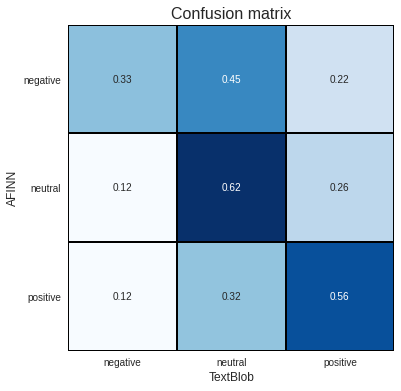

In [62]:
fig, (axis1) = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
plot_confusion_matrix(sentiment_category, sentiment_category_tb, ax=axis1,
                      class_names=['negative', 'neutral', 'positive'],
                      labels=['AFINN', 'TextBlob'])